In [1]:
import sympy as sp
from sympy import *
init_printing()
from IPython.display import display, Latex, HTML, Math
import numpy as np
import pandas as pd

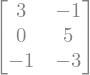

In [2]:
# Ex 6.4.1
v1 = Matrix([3, 0, -1])
x2 = Matrix([8, 5, -6])
v2 = x2 - x2.project(v1)
V = Matrix.hstack(v1,v2)
V

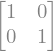

In [7]:
# 6.4.6
v1 = Matrix([3, -1, 2, -1])
x2 = Matrix([-5, 9, -9, 3])
v2 = x2 - x2.project(v1)
u1 = v1.normalized()
u2 = v2.normalized()
U = Matrix.hstack(u1,u2)
U.T * U

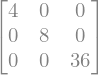

In [11]:
# 6.4.12 (same method for 6.4.24)
A = Matrix([[1,3,5],[-1,-3,1],[0,2,3],[1,5,2],[1,5,8]])
v1 = A[:,0]
v2 = A[:,1] - A[:,1].project(v1)
v3 = A[:,2] - A[:,2].project(v1) - A[:,2].project(v2)
V = Matrix.hstack(v1, v2, v3)
V.T * V

In [15]:
# 6.5.1 (same method for 6.5.3)
A = Matrix([[-1,2],[2,-3],[-1,3]])
b = Matrix([4, 1, 2])
AtA = A.T * A
Atb = A.T * b
Matrix.hstack(AtA, Atb).rref()[0][:,-1]

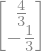

In [21]:
# 6.5.3 + 5
A = Matrix([[1,-2],[-1,2],[0,3], [2,5]])
b = Matrix([3, 1, -4, 2])
AtA = A.T * A
Atb = A.T * b
display(Matrix.hstack(AtA, Atb).rref()[0][:,-1],
       (A*Matrix.hstack(AtA, Atb).rref()[0][:,-1]-b).norm())

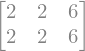

In [18]:
# 6.5.25
A = Matrix([[1,1],[1,1]])
b = Matrix([2,4])
AtA = A.T * A
Atb = A.T * b
Matrix.hstack(AtA, Atb).rref()[0][:,-1]

In [2]:
x = pd.DataFrame([-1, 0, 1, 2])
y = pd.DataFrame([0, 1, 2, 4])

In [10]:
X = Matrix([ones(len(x), 1)]).row_join(Matrix(x**2))
X
XtX = X.T * X
Xty = X.T * Matrix(y)
B = Matrix.hstack(XtX, Xty).rref()[0][:,-1]

In [32]:
display(Latex("$$y(t) = {}+{}t$$".format(round(B[0],2), round(B[1], 1))))

<IPython.core.display.Latex object>

In [12]:
# Exam 2019.6
df = pd.read_excel('Smoking_and_Cancer.xlsx')
df.head()

,State,Cigarettes sold,lung cancer
0,AL,18.20,17.05
1,AZ,25.82,19.80
2,AR,18.24,15.98
3,CA,28.60,22.07
4,CT,31.10,22.83


In [13]:
x = df['Cigarettes sold']
y = df['lung cancer']

In [14]:
# a) Design Matrix for linear model

X1 = Matrix([ones(len(x),1)]).row_join(Matrix(x))
XtX = X1.T*X1
Xty = X1.T*Matrix(y)
Mat, _ = XtX.row_join(Xty).rref()
B1 = Mat[:,-1]
display(Latex("$$f_1(x) = {}+{}x$$".format(round(B1[0],2), round(B1[1], 4))))

<IPython.core.display.Latex object>

In [15]:
# a) Design matrix for quadratic model

X2 = Matrix(x).row_join(Matrix(x**2))
XtX = X2.T*X2
Xty = X2.T*Matrix(y)
Mat, _ = XtX.row_join(Xty).rref()
B2 = Mat[:,-1]
display(Latex("$$f_2(x) = {}x{}x^2$$"
              .format(round(B2[0],2), round(B2[1], 4))))

<IPython.core.display.Latex object>

In [16]:
# b)

display(Latex(
    "The error of the linear model is {}, and the error of the quadratic is model {}."
    " We conclude that the quadratic model has the best fit for this specific data."
    .format(round((Matrix(y)-X1*B1).norm(), 2), round((Matrix(y)-X2*B2).norm(), 2))))

<IPython.core.display.Latex object>

In [17]:
# c)
display(Math('f_2(50) = ' + repr(round(B2[0]*50+B2[1]*50**2, 2))))

<IPython.core.display.Math object>

In [50]:
# SVD
A = Matrix([[7,1], [0, 0], [5, 5]])
AtA = A.T * A
AtA.eigenvects()
v1 = AtA.eigenvects()[1][2][0].normalized()
v2 = AtA.eigenvects()[0][2][0].normalized()
V = Matrix.hstack(v1,v2)
Vt = V.T
s1 = sqrt(AtA.eigenvects()[1][0])
s2 = sqrt(AtA.eigenvects()[0][0])

In [55]:
u1 = (s1**-1)*A*v1
u2 = (s2**-1)*A*v2
u3 = Matrix([0,1,0])
U = Matrix.hstack(u1,u2,u3)
S = Matrix.vstack(diag(s1,s2), zeros(1,2))
U*S*Vt == A

True

In [58]:
AAt = A*A.T
AAt.eigenvects()
u1 = AAt.eigenvects()[2][2][0].normalized()
u2 = AAt.eigenvects()[1][2][0].normalized()
u3 = AAt.eigenvects()[0][2][0].normalized()
U = Matrix.hstack(u1,u2, u3)
s1 = sqrt(AAt.eigenvects()[2][0])
s2 = sqrt(AAt.eigenvects()[1][0])
s3 = sqrt(AAt.eigenvects()[0][0])

In [59]:
v1 = s1*u1*A**-1
v1 # doesn't work

NonSquareMatrixError: 